#       بِسمِ اللہِ الرَّحمٰنِ الرَّحِيم  .    شُروع اَللہ کے پاک نام سے جو بڑا مہر بان نہايت رحم والا ہے    

# Import Libraries

In [1]:
import re
import string
import scipy
import pickle
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from astropy.table import Table,Column 
from prettytable import PrettyTable
import warnings
import nltk
nltk.download('stopwords')

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


[nltk_data] Downloading package stopwords to C:\Users\Muhammad Umair
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read and Understand Train and Test Data

In [2]:
df = pd.read_csv (r'C:\Users\Muhammad Umair Ali\Desktop\Assignment#3\train.csv')

df.columns.name = 'index'

print (df)


index                                               Text     Type
0      \tGo until jurong point crazy.. Available only...  NotSpam
1                        \tOk lar... Joking wif u oni...  NotSpam
2      \tFree entry in 2 a wkly comp to win FA Cup fi...     Spam
3      \tU dun say so early hor... U c already then s...  NotSpam
4      \tNah I don't think he goes to usf he lives ar...  NotSpam
5      \tFreeMsg Hey there darling it's been 3 week's...     Spam
6      \tEven my brother is not like to speak with me...  NotSpam
7      \tAs per your request 'Melle Melle (Oru Minnam...  NotSpam
8      \tWINNER!! As a valued network customer you ha...     Spam
9      \tHad your mobile 11 months or more? U R entit...     Spam
10     \tI'm gonna be home soon and i don't want to t...  NotSpam
11     \tSIX chances to win CASH! From 100 to 20000 p...     Spam
12     \tURGENT! You have won a 1 week FREE membershi...     Spam
13     \tI've been searching for the right words to t...  NotSpam
14        

In [3]:
df['Text']=df['Text'].map(lambda x : str(x)[1:])

In [4]:
print(df)

index                                               Text     Type
0      Go until jurong point crazy.. Available only i...  NotSpam
1                          Ok lar... Joking wif u oni...  NotSpam
2      Free entry in 2 a wkly comp to win FA Cup fina...     Spam
3      U dun say so early hor... U c already then say...  NotSpam
4      Nah I don't think he goes to usf he lives arou...  NotSpam
5      FreeMsg Hey there darling it's been 3 week's n...     Spam
6      Even my brother is not like to speak with me. ...  NotSpam
7      As per your request 'Melle Melle (Oru Minnamin...  NotSpam
8      WINNER!! As a valued network customer you have...     Spam
9      Had your mobile 11 months or more? U R entitle...     Spam
10     I'm gonna be home soon and i don't want to tal...  NotSpam
11     SIX chances to win CASH! From 100 to 20000 pou...     Spam
12     URGENT! You have won a 1 week FREE membership ...     Spam
13     I've been searching for the right words to tha...  NotSpam
14        

In [5]:
print('\n')
print('\n Train Dataset Columns \n ')
print (df.columns)

print('\n Number of Instances in Dataset  ')

print(len(df.index))






 Train Dataset Columns 
 
Index(['Text', 'Type'], dtype='object', name='index')

 Number of Instances in Dataset  
210


In [6]:
print ('Test DataSet:\n')
dftest = pd.read_csv (r'C:\Users\Muhammad Umair Ali\Desktop\Assignment#3\Test.csv')
print (dftest)
dftest.columns.name = 'index'
print('\n')
print('\n Test Dataset Columns \n ')
print (dftest.columns)

print('\n Number of Instances in Test Dataset  ')

print(len(dftest.index))

Test DataSet:

                                                 Text     Type
0           \tBoth :) i shoot big loads so get ready!  NotSpam
1   \tWhat's up bruv hope you had a great break. D...  NotSpam
2                        \tHome so we can always chat  NotSpam
3                           \tK:)k:)good:)study well.  NotSpam
4                           \tYup... How ü noe leh...  NotSpam
5                   \tSounds great! Are you home now?  NotSpam
6   \tFinally the match heading towards draw as yo...  NotSpam
7   \tTired. I haven't slept well the past few nig...  NotSpam
8         \tEasy ah?sen got selected means its good..  NotSpam
9                  \tI have to take exam with march 3  NotSpam
10  \tYeah you should. I think you can use your gt...  NotSpam
11                        \tOk no prob. Take ur time.  NotSpam
12  \tThere is os called ubandu which will run wit...  NotSpam
13                            \tSorry I'll call later  NotSpam
14  \tU say leh... Of course nothing hap

In [7]:
dftest['Text']=dftest['Text'].map(lambda x : str(x)[1:])
print(dftest)

index                                               Text     Type
0                Both :) i shoot big loads so get ready!  NotSpam
1      What's up bruv hope you had a great break. Do ...  NotSpam
2                             Home so we can always chat  NotSpam
3                                K:)k:)good:)study well.  NotSpam
4                                Yup... How ü noe leh...  NotSpam
5                        Sounds great! Are you home now?  NotSpam
6      Finally the match heading towards draw as your...  NotSpam
7       Tired. I haven't slept well the past few nights.  NotSpam
8              Easy ah?sen got selected means its good..  NotSpam
9                       I have to take exam with march 3  NotSpam
10     Yeah you should. I think you can use your gt a...  NotSpam
11                             Ok no prob. Take ur time.  NotSpam
12     There is os called ubandu which will run witho...  NotSpam
13                                 Sorry I'll call later  NotSpam
14     U s

In [8]:
dframe=pd.DataFrame(df)
print(len(dframe[dframe['Type'] == 'Spam']),"Type by 'Spam' in Train ")   
print (dframe[dframe['Type'] == 'Spam'])

33 Type by 'Spam' in Train 
index                                               Text  Type
2      Free entry in 2 a wkly comp to win FA Cup fina...  Spam
5      FreeMsg Hey there darling it's been 3 week's n...  Spam
8      WINNER!! As a valued network customer you have...  Spam
9      Had your mobile 11 months or more? U R entitle...  Spam
11     SIX chances to win CASH! From 100 to 20000 pou...  Spam
12     URGENT! You have won a 1 week FREE membership ...  Spam
15     XXXMobileMovieClub: To use your credit click t...  Spam
19     England v Macedonia - dont miss the goals/team...  Spam
34     Thanks for your subscription to Ringtone UK yo...  Spam
42     07732584351 - Rodger Burns - MSG = We tried to...  Spam
54     SMS. ac Sptv: The New Jersey Devils and the De...  Spam
56     Congrats! 1 year special cinema pass for 2 is ...  Spam
65     As a valued customer I am pleased to advise yo...  Spam
67     Urgent UR awarded a complimentary trip to Euro...  Spam
68     Did you hear about t

In [9]:
print(len(dframe[dframe['Type'] == 'NotSpam']),"Type by 'NotSpam' in Train ")   
print (dframe[dframe['Type'] == 'NotSpam'])

177 Type by 'NotSpam' in Train 
index                                               Text     Type
0      Go until jurong point crazy.. Available only i...  NotSpam
1                          Ok lar... Joking wif u oni...  NotSpam
3      U dun say so early hor... U c already then say...  NotSpam
4      Nah I don't think he goes to usf he lives arou...  NotSpam
6      Even my brother is not like to speak with me. ...  NotSpam
7      As per your request 'Melle Melle (Oru Minnamin...  NotSpam
10     I'm gonna be home soon and i don't want to tal...  NotSpam
13     I've been searching for the right words to tha...  NotSpam
14                   I HAVE A DATE ON SUNDAY WITH WILL!!  NotSpam
16                            Oh k...i'm watching here:)  NotSpam
17     Eh u remember how 2 spell his name... Yes i di...  NotSpam
18     Fine if thats the way u feel. Thats the way ...  NotSpam
20             Is that seriously how you spell his name?  NotSpam
21       I‘m going to try for 2 months ha ha

In [10]:
dframe2=pd.DataFrame(dftest)
print(len(dframe2[dframe2['Type'] == 'Spam']),"Type by 'Spam' in Test ")   
print (dframe2[dframe2['Type'] == 'Spam'])


11 Type by 'Spam' in Test 
index                                               Text  Type
15     500 New Mobiles from 2004 MUST GO! Txt: NOKIA ...  Spam
17     Will u meet ur dream partner soon? Is ur caree...  Spam
25     Text & meet someone sexy today. U can find a d...  Spam
30     U 447801259231 have a secret admirer who is lo...  Spam
40     Congratulations ur awarded 500 of CD vouchers ...  Spam
49     We tried to contact you re your reply to our o...  Spam
54     Hey I am really horny want to chat or see me n...  Spam
58     Ur ringtone service has changed! 25 Free credi...  Spam
60     Ringtone Club: Get the UK singles chart on you...  Spam
63     HMV BONUS SPECIAL 500 pounds of genuine HMV vo...  Spam
86     T-Mobile customer you may now claim your FREE ...  Spam


In [11]:
print(len(dframe2[dframe2['Type'] == 'NotSpam']),"Type by 'NotSpam' in Test ")   
print (dframe2[dframe2['Type'] == 'NotSpam'])


79 Type by 'NotSpam' in Test 
index                                               Text     Type
0                Both :) i shoot big loads so get ready!  NotSpam
1      What's up bruv hope you had a great break. Do ...  NotSpam
2                             Home so we can always chat  NotSpam
3                                K:)k:)good:)study well.  NotSpam
4                                Yup... How ü noe leh...  NotSpam
5                        Sounds great! Are you home now?  NotSpam
6      Finally the match heading towards draw as your...  NotSpam
7       Tired. I haven't slept well the past few nights.  NotSpam
8              Easy ah?sen got selected means its good..  NotSpam
9                       I have to take exam with march 3  NotSpam
10     Yeah you should. I think you can use your gt a...  NotSpam
11                             Ok no prob. Take ur time.  NotSpam
12     There is os called ubandu which will run witho...  NotSpam
13                                 Sorry I'll 

In [12]:
print("Word used By 'Spam' in train Data")
dframe[dframe['Type'] == 'Spam'].Text.str.split(expand=True).stack().value_counts()

Word used By 'Spam' in train Data


to                  37
a                   22
you                 16
the                 12
call                10
or                   9
have                 9
2                    9
for                  8
claim                6
on                   6
are                  6
is                   6
your                 6
our                  5
U                    5
and                  5
Please               5
receive              5
£1000                5
mobile               4
be                   4
Call                 4
selected             4
To                   4
If                   4
been                 4
customer             4
with                 4
You                  4
                    ..
nokia                1
4742                 1
svc.                 1
Or                   1
Cost                 1
145                  1
UK's                 1
09066364589          1
You'll               1
http://wap.          1
up                   1
MSG                  1
review     

In [13]:
print("Word used By 'NotSpam' in train Data")
dframe[dframe['Type'] == 'NotSpam'].Text.str.split(expand=True).stack().value_counts()

Word used By 'NotSpam' in train Data


you          72
I            71
to           54
my           39
the          38
a            35
i            33
and          32
for          30
in           28
that         26
me           23
on           20
your         20
of           19
have         19
I'm          18
is           18
so           17
u            16
not          15
all          15
with         14
will         14
when         13
at           13
like         13
it           13
U            12
?            11
             ..
wishin        1
hospital.     1
V.            1
SUM           1
left          1
name?         1
msg           1
WANNA         1
Toll          1
Send          1
need.         1
&amp;         1
steed         1
bus           1
Dont          1
"the          1
Spamnish      1
Hi.           1
cried         1
Double        1
letter        1
bucks         1
typical       1
Good          1
earn          1
back?         1
Go            1
Xmas          1
Mr            1
str           1
Length: 1201, dtype: int

In [14]:
print("Word used By 'Spam' in test Data")
dframe2[dframe2['Type'] == 'Spam'].Text.str.split(expand=True).stack().value_counts()

Word used By 'Spam' in test Data


to             13
&               6
a               5
your            4
or              4
of              4
ur              4
2               4
txt             3
HMV             3
text            3
on              3
who             3
500             3
contact         2
vouchers        2
find            2
is              2
69698           2
you             2
choose          2
with            2
HORO            2
4               2
U               2
meet            2
Free            2
out             2
free            2
start?          1
               ..
Video           1
the             1
Just            1
89545           1
Ringtone        1
stop            1
anytime         1
partner         1
collect         1
CAMERA          1
message         1
naked           1
More            1
dream           1
pounds          1
08000930705     1
MUST            1
its             1
Club:           1
sign            1
Ur              1
see             1
followed        1
networks        1
our       

In [15]:
print("Word used By 'NotSpam' in test Data")
dframe2[dframe2['Type'] == 'NotSpam'].Text.str.split(expand=True).stack().value_counts()

Word used By 'NotSpam' in test Data


you           25
to            22
I             21
the           21
a             17
in            15
my            11
and           10
have           9
i              9
are            8
is             8
so             7
u              7
now            6
me             6
it             6
if             6
be             5
of             5
on             5
your           5
but            5
that           5
call           5
But            5
.              5
get            5
just           4
I'm            4
              ..
Or             1
though         1
MISS           1
Both           1
us.            1
yet            1
money          1
me.            1
plan           1
register.      1
U..            1
0125698789     1
New            1
shop..         1
Make           1
plz            1
cal            1
walk           1
Get            1
xxx            1
lesson         1
cant.          1
Tired.         1
IN             1
tonight        1
Yup...         1
being          1
Nice          

Total Number of 'Spam' and 'NotSpam' in Train Data 


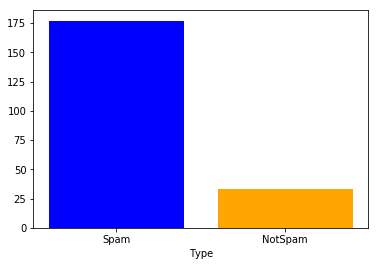

In [17]:
import matplotlib.pyplot as plt
print("Total Number of 'Spam' and 'NotSpam' in Train Data ")
sizefe=len(dframe[dframe['Type'] == 'Spam'])
sizem=len(dframe[dframe['Type'] == 'NotSpam'])
height=[sizem,sizefe]
bars = ('Spam', 'NotSpam')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height,color=('blue','orange'))
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Type')
# Show graphic
plt.show()

Total Number of 'Male' and 'Female' in Test Data 


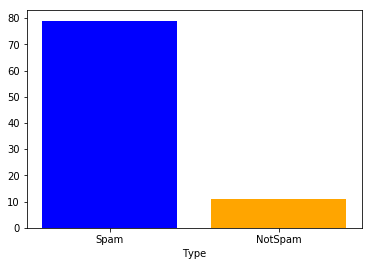

In [18]:
print("Total Number of 'Male' and 'Female' in Test Data ")
sizefe2=len(dframe2[dframe2['Type'] == 'Spam'])
sizem2=len(dframe2[dframe2['Type'] == 'NotSpam'])
height=[sizem2,sizefe2]
bars = ('Spam', 'NotSpam')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height,color=('blue','orange'))
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Type')
# Show graphic
plt.show()

# Pre-Process Data

In [19]:
print("Train Dataset before preprocessing")
print(dframe)

Train Dataset before preprocessing
index                                               Text     Type
0      Go until jurong point crazy.. Available only i...  NotSpam
1                          Ok lar... Joking wif u oni...  NotSpam
2      Free entry in 2 a wkly comp to win FA Cup fina...     Spam
3      U dun say so early hor... U c already then say...  NotSpam
4      Nah I don't think he goes to usf he lives arou...  NotSpam
5      FreeMsg Hey there darling it's been 3 week's n...     Spam
6      Even my brother is not like to speak with me. ...  NotSpam
7      As per your request 'Melle Melle (Oru Minnamin...  NotSpam
8      WINNER!! As a valued network customer you have...     Spam
9      Had your mobile 11 months or more? U R entitle...     Spam
10     I'm gonna be home soon and i don't want to tal...  NotSpam
11     SIX chances to win CASH! From 100 to 20000 pou...     Spam
12     URGENT! You have won a 1 week FREE membership ...     Spam
13     I've been searching for the right 

In [20]:
print("Test Dataset before preprocessing")
print(dframe2)

Test Dataset before preprocessing
index                                               Text     Type
0                Both :) i shoot big loads so get ready!  NotSpam
1      What's up bruv hope you had a great break. Do ...  NotSpam
2                             Home so we can always chat  NotSpam
3                                K:)k:)good:)study well.  NotSpam
4                                Yup... How ü noe leh...  NotSpam
5                        Sounds great! Are you home now?  NotSpam
6      Finally the match heading towards draw as your...  NotSpam
7       Tired. I haven't slept well the past few nights.  NotSpam
8              Easy ah?sen got selected means its good..  NotSpam
9                       I have to take exam with march 3  NotSpam
10     Yeah you should. I think you can use your gt a...  NotSpam
11                             Ok no prob. Take ur time.  NotSpam
12     There is os called ubandu which will run witho...  NotSpam
13                                 Sorry I

In [21]:
import logging
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
dframe['Text'] = dframe['Text'].apply(clean_text)

dframe2['Text']=dframe2['Text'].apply(clean_text)


In [22]:
print("Train Dataset After preprocessing")
print(dframe)

Train Dataset After preprocessing
index                                               Text     Type
0      go jurong point crazy available bugis n great ...  NotSpam
1                                ok lar joking wif u oni  NotSpam
2      free entry 2 wkly comp win fa cup final tkts 2...     Spam
3                    u dun say early hor u c already say  NotSpam
4            nah dont think goes usf lives around though  NotSpam
5      freemsg hey darling 3 weeks word back id like ...     Spam
6         even brother like speak treat like aids patent  NotSpam
7      per request melle melle oru minnaminunginte nu...  NotSpam
8      winner valued network customer selected receiv...     Spam
9      mobile 11 months u r entitled update latest co...     Spam
10     im gonna home soon dont want talk stuff anymor...  NotSpam
11     six chances win cash 100 20000 pounds txt csh1...     Spam
12     urgent 1 week free membership 100000 prize jac...     Spam
13     ive searching right words thank bre

In [23]:
print("Test Dataset After preprocessing")
print(dframe2)

Test Dataset After preprocessing
index                                               Text     Type
0                              shoot big loads get ready  NotSpam
1         whats bruv hope great break rewarding semester  NotSpam
2                                       home always chat  NotSpam
3                                    k k good study well  NotSpam
4                                            yup noe leh  NotSpam
5                                      sounds great home  NotSpam
6          finally match heading towards draw prediction  NotSpam
7                    tired havent slept well past nights  NotSpam
8                     easy ahsen got selected means good  NotSpam
9                                      take exam march 3  NotSpam
10     yeah think use gt atm register sure theres any...  NotSpam
11                                  ok prob take ur time  NotSpam
12     os called ubandu run without installing hard d...  NotSpam
13                                  sorry i

# Label Encoding For Train/Test Data

In [24]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dframe["encoded_type"] = encode.fit_transform(dframe["Type"])
print("Type Attribute Encoding in Train Dataset\n")
print(dframe[["Text", "encoded_type"]])


Type Attribute Encoding in Train Dataset

index                                               Text  encoded_type
0      go jurong point crazy available bugis n great ...             0
1                                ok lar joking wif u oni             0
2      free entry 2 wkly comp win fa cup final tkts 2...             1
3                    u dun say early hor u c already say             0
4            nah dont think goes usf lives around though             0
5      freemsg hey darling 3 weeks word back id like ...             1
6         even brother like speak treat like aids patent             0
7      per request melle melle oru minnaminunginte nu...             0
8      winner valued network customer selected receiv...             1
9      mobile 11 months u r entitled update latest co...             1
10     im gonna home soon dont want talk stuff anymor...             0
11     six chances win cash 100 20000 pounds txt csh1...             1
12     urgent 1 week free membershi

In [25]:
encodetest = LabelEncoder()
dframe2["encoded_type"] = encodetest.fit_transform(dframe2["Type"])
print("Type Attribute Encoding in Train Dataset\n")
print(dframe2[["Text", "encoded_type"]])

Type Attribute Encoding in Train Dataset

index                                               Text  encoded_type
0                              shoot big loads get ready             0
1         whats bruv hope great break rewarding semester             0
2                                       home always chat             0
3                                    k k good study well             0
4                                            yup noe leh             0
5                                      sounds great home             0
6          finally match heading towards draw prediction             0
7                    tired havent slept well past nights             0
8                     easy ahsen got selected means good             0
9                                      take exam march 3             0
10     yeah think use gt atm register sure theres any...             0
11                                  ok prob take ur time             0
12     os called ubandu run without

In [26]:
dframe['Type']=dframe['encoded_type']
dframe2['Type']=dframe2['encoded_type']
dframe.pop('encoded_type')
dframe2.pop('encoded_type')
...

Ellipsis

In [27]:
print("Combine Both Train and Test\n")
d1 = pd.DataFrame(dframe)
d2 = pd.DataFrame(dframe2)
temp=pd.concat([d1, d2])
print(temp)

Combine Both Train and Test

index                                               Text  Type
0      go jurong point crazy available bugis n great ...     0
1                                ok lar joking wif u oni     0
2      free entry 2 wkly comp win fa cup final tkts 2...     1
3                    u dun say early hor u c already say     0
4            nah dont think goes usf lives around though     0
5      freemsg hey darling 3 weeks word back id like ...     1
6         even brother like speak treat like aids patent     0
7      per request melle melle oru minnaminunginte nu...     0
8      winner valued network customer selected receiv...     1
9      mobile 11 months u r entitled update latest co...     1
10     im gonna home soon dont want talk stuff anymor...     0
11     six chances win cash 100 20000 pounds txt csh1...     1
12     urgent 1 week free membership 100000 prize jac...     1
13     ive searching right words thank breather promi...     0
14                        

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [29]:
X = vectorizer.fit(temp['Text'])

train_feacture=X.transform(dframe['Text'])
test_feacture=X.transform(dframe2['Text'])
print("Check Shape of the Features\n")
print("Train Feature Shape:",train_feacture.shape)
print("Test Feature Shape:",test_feacture.shape)


Check Shape of the Features

Train Feature Shape: (210, 100)
Test Feature Shape: (90, 100)


In [30]:
train_vector=pd.DataFrame(train_feacture.toarray(),columns=vectorizer.get_feature_names())
tpred_vector=pd.DataFrame(train_feacture.toarray(),columns=vectorizer.get_feature_names())

print("Train features before Assigning 'Type' Column\n")
print(train_vector)

Train features before Assigning 'Type' Column

     1000  already  always  anything  back  bit  call  callertune  cant  car  \
0       0        0       0         0     0    0     0           0     0    0   
1       0        0       0         0     0    0     0           0     0    0   
2       0        0       0         0     0    0     0           0     0    0   
3       0        1       0         0     0    0     0           0     0    0   
4       0        0       0         0     0    0     0           0     0    0   
5       0        0       0         0     1    0     0           0     0    0   
6       0        0       0         0     0    0     0           0     0    0   
7       0        0       0         0     0    0     0           2     0    0   
8       0        0       0         0     0    0     1           0     0    0   
9       0        0       0         0     0    0     1           0     0    0   
10      0        0       0         0     0    0     0           0     0  

In [31]:
test_vector=pd.DataFrame(test_feacture.toarray(),columns=vectorizer.get_feature_names())
predvector=pd.DataFrame(test_feacture.toarray(),columns=vectorizer.get_feature_names())
print("Test features before Assigning 'Type' Column\n")
print(test_vector)

Test features before Assigning 'Type' Column

    1000  already  always  anything  back  bit  call  callertune  cant  car  \
0      0        0       0         0     0    0     0           0     0    0   
1      0        0       0         0     0    0     0           0     0    0   
2      0        0       1         0     0    0     0           0     0    0   
3      0        0       0         0     0    0     0           0     0    0   
4      0        0       0         0     0    0     0           0     0    0   
5      0        0       0         0     0    0     0           0     0    0   
6      0        0       0         0     0    0     0           0     0    0   
7      0        0       0         0     0    0     0           0     0    0   
8      0        0       0         0     0    0     0           0     0    0   
9      0        0       0         0     0    0     0           0     0    0   
10     0        0       0         0     0    0     0           0     0    0   
11    

In [32]:
train_vector['Type']=dframe['Type']
print("Train features After Assigning 'Type' Column\n")
print(train_vector)

Train features After Assigning 'Type' Column

     1000  already  always  anything  back  bit  call  callertune  cant  car  \
0       0        0       0         0     0    0     0           0     0    0   
1       0        0       0         0     0    0     0           0     0    0   
2       0        0       0         0     0    0     0           0     0    0   
3       0        1       0         0     0    0     0           0     0    0   
4       0        0       0         0     0    0     0           0     0    0   
5       0        0       0         0     1    0     0           0     0    0   
6       0        0       0         0     0    0     0           0     0    0   
7       0        0       0         0     0    0     0           2     0    0   
8       0        0       0         0     0    0     1           0     0    0   
9       0        0       0         0     0    0     1           0     0    0   
10      0        0       0         0     0    0     0           0     0   

In [33]:
test_vector['Type']=dframe2['Type']
print("Test features After Assigning 'Type' Column\n")
print(test_vector)

Test features After Assigning 'Type' Column

    1000  already  always  anything  back  bit  call  callertune  cant  car  \
0      0        0       0         0     0    0     0           0     0    0   
1      0        0       0         0     0    0     0           0     0    0   
2      0        0       1         0     0    0     0           0     0    0   
3      0        0       0         0     0    0     0           0     0    0   
4      0        0       0         0     0    0     0           0     0    0   
5      0        0       0         0     0    0     0           0     0    0   
6      0        0       0         0     0    0     0           0     0    0   
7      0        0       0         0     0    0     0           0     0    0   
8      0        0       0         0     0    0     0           0     0    0   
9      0        0       0         0     0    0     0           0     0    0   
10     0        0       0         0     0    0     0           0     0    0   
11     

In [34]:
print("Check Shape of the Features\n")
print("Train Feature Shape:",train_vector.shape)
print("Test Feature Shape:",test_vector.shape)


Check Shape of the Features

Train Feature Shape: (210, 101)
Test Feature Shape: (90, 101)


In [35]:
from sklearn import datasets, linear_model, metrics
# create Logistic Regression object
reg = linear_model.LogisticRegression(solver='lbfgs')
print(reg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [36]:
from sklearn.ensemble import RandomForestClassifier
# create Random forest object
random = RandomForestClassifier()
print(random)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [37]:
from sklearn.svm import LinearSVC
# create LinearSV object
LSV = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
intercept_scaling=1, loss='squared_hinge', max_iter=1000,
multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
print(LSV)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)


In [38]:
from sklearn.naive_bayes import BernoulliNB
# create BernoulliNB object
Ber =BernoulliNB()
print(Ber)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [39]:
print('Before Prediction using Logistic Regression\n')
df_test = pd.read_csv (r'C:\Users\Muhammad Umair Ali\Desktop\Assignment#3\test.csv')

df_test.columns.name = 'index'

df_test['Text']=df_test['Text'].map(lambda x : str(x)[1:])
df_test['Text']=df_test['Text'].apply(clean_text)

print (df_test)

Before Prediction using Logistic Regression

index                                               Text     Type
0                              shoot big loads get ready  NotSpam
1         whats bruv hope great break rewarding semester  NotSpam
2                                       home always chat  NotSpam
3                                    k k good study well  NotSpam
4                                            yup noe leh  NotSpam
5                                      sounds great home  NotSpam
6          finally match heading towards draw prediction  NotSpam
7                    tired havent slept well past nights  NotSpam
8                     easy ahsen got selected means good  NotSpam
9                                      take exam march 3  NotSpam
10     yeah think use gt atm register sure theres any...  NotSpam
11                                  ok prob take ur time  NotSpam
12     os called ubandu run without installing hard d...  NotSpam
13                             

In [40]:

reg.fit(tpred_vector,train_vector['Type'])
y_pred = reg.predict(predvector)


In [41]:
from sklearn.ensemble import RandomForestClassifier
# create Random forest object
random = RandomForestClassifier()
# train the model using the training sets
random.fit(tpred_vector,train_vector['Type'])
# making predictions on the testing set
y_predrandom = random.predict(predvector)


In [42]:
from sklearn.svm import LinearSVC
# create LinearSV object
LSV = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
intercept_scaling=1, loss='squared_hinge', max_iter=1000,
multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

# train the model using the training sets
LSV.fit(tpred_vector,train_vector['Type'])

# making predictions on the testing set
LSV_pred = LSV.predict(predvector)


In [43]:
from sklearn.naive_bayes import BernoulliNB
# create BernoulliNB object
Ber =BernoulliNB()
# train the model using the training sets
Ber.fit(tpred_vector,train_vector['Type'])
# making predictions on the testing set
Ber_pred = Ber.predict(predvector)


In [44]:

decodeg=encodetest.inverse_transform(y_pred)

decodeg2=encodetest.inverse_transform(y_predrandom)

decodeg3=encodetest.inverse_transform(LSV_pred)

decodeg4=encodetest.inverse_transform(Ber_pred)


In [45]:
print('After Prediction using Logistic Regression\n')
df_test['Pred_Type']=decodeg
print(df_test[['Text','Type','Pred_Type']])
print("Logistic Regression model accuracy:",
accuracy_score(test_vector['Type'], y_pred ))

After Prediction using Logistic Regression

index                                               Text     Type Pred_Type
0                              shoot big loads get ready  NotSpam   NotSpam
1         whats bruv hope great break rewarding semester  NotSpam   NotSpam
2                                       home always chat  NotSpam   NotSpam
3                                    k k good study well  NotSpam   NotSpam
4                                            yup noe leh  NotSpam   NotSpam
5                                      sounds great home  NotSpam   NotSpam
6          finally match heading towards draw prediction  NotSpam   NotSpam
7                    tired havent slept well past nights  NotSpam   NotSpam
8                     easy ahsen got selected means good  NotSpam   NotSpam
9                                      take exam march 3  NotSpam   NotSpam
10     yeah think use gt atm register sure theres any...  NotSpam   NotSpam
11                                  ok prob 

In [46]:
print('After Prediction using Random Forest\n')
df_test['Pred_TypeR']=decodeg2
print(df_test[['Text','Type','Pred_TypeR']])

print("Random Forest model accuracy:",
accuracy_score(test_vector['Type'], y_predrandom ))

After Prediction using Random Forest

index                                               Text     Type Pred_TypeR
0                              shoot big loads get ready  NotSpam    NotSpam
1         whats bruv hope great break rewarding semester  NotSpam    NotSpam
2                                       home always chat  NotSpam    NotSpam
3                                    k k good study well  NotSpam    NotSpam
4                                            yup noe leh  NotSpam    NotSpam
5                                      sounds great home  NotSpam    NotSpam
6          finally match heading towards draw prediction  NotSpam    NotSpam
7                    tired havent slept well past nights  NotSpam    NotSpam
8                     easy ahsen got selected means good  NotSpam    NotSpam
9                                      take exam march 3  NotSpam    NotSpam
10     yeah think use gt atm register sure theres any...  NotSpam    NotSpam
11                                  ok

In [47]:
print('After Prediction using LinearSVC\n')
df_test['Pred_TypeL']=decodeg3
print(df_test[['Text','Type','Pred_TypeL']])

print("LinearSV model accuracy:",
accuracy_score(test_vector['Type'], LSV_pred ))

After Prediction using LinearSVC

index                                               Text     Type Pred_TypeL
0                              shoot big loads get ready  NotSpam    NotSpam
1         whats bruv hope great break rewarding semester  NotSpam    NotSpam
2                                       home always chat  NotSpam    NotSpam
3                                    k k good study well  NotSpam    NotSpam
4                                            yup noe leh  NotSpam    NotSpam
5                                      sounds great home  NotSpam    NotSpam
6          finally match heading towards draw prediction  NotSpam    NotSpam
7                    tired havent slept well past nights  NotSpam    NotSpam
8                     easy ahsen got selected means good  NotSpam    NotSpam
9                                      take exam march 3  NotSpam    NotSpam
10     yeah think use gt atm register sure theres any...  NotSpam    NotSpam
11                                  ok pro

In [48]:
print('After Prediction using BernouliiNB\n')
df_test['Pred_TypeB']=decodeg4
print(df_test[['Text','Type','Pred_TypeB']])

print("BernoulliNB model accuracy:",
accuracy_score(test_vector['Type'], Ber_pred ))

After Prediction using BernouliiNB

index                                               Text     Type Pred_TypeB
0                              shoot big loads get ready  NotSpam    NotSpam
1         whats bruv hope great break rewarding semester  NotSpam    NotSpam
2                                       home always chat  NotSpam    NotSpam
3                                    k k good study well  NotSpam    NotSpam
4                                            yup noe leh  NotSpam    NotSpam
5                                      sounds great home  NotSpam    NotSpam
6          finally match heading towards draw prediction  NotSpam    NotSpam
7                    tired havent slept well past nights  NotSpam    NotSpam
8                     easy ahsen got selected means good  NotSpam    NotSpam
9                                      take exam march 3  NotSpam    NotSpam
10     yeah think use gt atm register sure theres any...  NotSpam    NotSpam
11                                  ok p

# Selection of Best Modal

In [49]:
x = PrettyTable()
x.field_names = ["Modal", "Accuracy"]
x.add_row(["Logistic Regression",accuracy_score(test_vector['Type'], y_pred)])
x.add_row(["RandomForestClassifier",accuracy_score(test_vector['Type'], y_predrandom)])
x.add_row(["LinearSVC",accuracy_score(test_vector['Type'], LSV_pred )])
x.add_row(["BernoulliNB",accuracy_score(test_vector['Type'], Ber_pred )])
print("Detailed Performance of all modals")
print(x)
a=accuracy_score(test_vector['Type'], y_pred )
b=accuracy_score(test_vector['Type'], y_predrandom )
c=accuracy_score(test_vector['Type'], LSV_pred )
d=accuracy_score(test_vector['Type'], Ber_pred )
max(a,b,c,d)
y = PrettyTable()
y.field_names = ["Modal", "Accuracy"]
y.add_row(["LinearSVC",accuracy_score(test_vector['Type'], LSV_pred)])
print("Best Modal")
print(y)

Detailed Performance of all modals
+------------------------+--------------------+
|         Modal          |      Accuracy      |
+------------------------+--------------------+
|  Logistic Regression   | 0.9555555555555556 |
| RandomForestClassifier | 0.9333333333333333 |
|       LinearSVC        | 0.9666666666666667 |
|      BernoulliNB       | 0.9555555555555556 |
+------------------------+--------------------+
Best Modal
+-----------+--------------------+
|   Modal   |      Accuracy      |
+-----------+--------------------+
| LinearSVC | 0.9666666666666667 |
+-----------+--------------------+


In [50]:
print("All Features in the form of DataFrame\n")
d1 = pd.DataFrame(train_vector)
d2 = pd.DataFrame(test_vector)
temp1=pd.concat([d1, d2])
print(temp1)

All Features in the form of DataFrame

    1000  already  always  anything  back  bit  call  callertune  cant  car  \
0      0        0       0         0     0    0     0           0     0    0   
1      0        0       0         0     0    0     0           0     0    0   
2      0        0       0         0     0    0     0           0     0    0   
3      0        1       0         0     0    0     0           0     0    0   
4      0        0       0         0     0    0     0           0     0    0   
5      0        0       0         0     1    0     0           0     0    0   
6      0        0       0         0     0    0     0           0     0    0   
7      0        0       0         0     0    0     0           2     0    0   
8      0        0       0         0     0    0     1           0     0    0   
9      0        0       0         0     0    0     1           0     0    0   
10     0        0       0         0     0    0     0           0     0    0   
11     0     

In [51]:
out_test=temp1['Type']
temp1.pop('Type')
...

Ellipsis

# Train Best Model on All Data

In [52]:

FinalLSV = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
intercept_scaling=1, loss='squared_hinge', max_iter=1000,
multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

# train the model using the training sets
FinalLSV.fit(temp1,out_test)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

# Make Prediction on UnSeen/New Data

In [53]:
msg =input("Please Enter your Email here:\n") 


Please Enter your Email here:
500 new mobiles 2004 must go txt nokia 89545


In [54]:
value=[{'Message': msg}]
attri =['Message']
userinput=pd.DataFrame(value, columns=attri)
print('User Input in Actual DataFrame Form:\n')
userinput['Message']=userinput['Message'].apply(clean_text)
print(userinput)

User Input in Actual DataFrame Form:

                                        Message
0  500 new mobiles 2004 must go txt nokia 89545


In [55]:
final_transform=X.transform(userinput['Message'])
print(final_transform.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


In [56]:
result=pd.DataFrame(final_transform.toarray(),columns=vectorizer.get_feature_names())
print(result)

   1000  already  always  anything  back  bit  call  callertune  cant  car  \
0     0        0       0         0     0    0     0           0     0    0   

  ...   tonight  txt  ur  want  way  well  work  yeah  yes  yet  
0 ...         0    1   0     0    0     0     0     0    0    0  

[1 rows x 100 columns]


In [57]:
final_predLinearLSV = FinalLSV.predict(result) 
decodefinal=encodetest.inverse_transform(final_predLinearLSV)
print("Prediction:",decodefinal)


Prediction: ['Spam']


# JAZAKALLAH